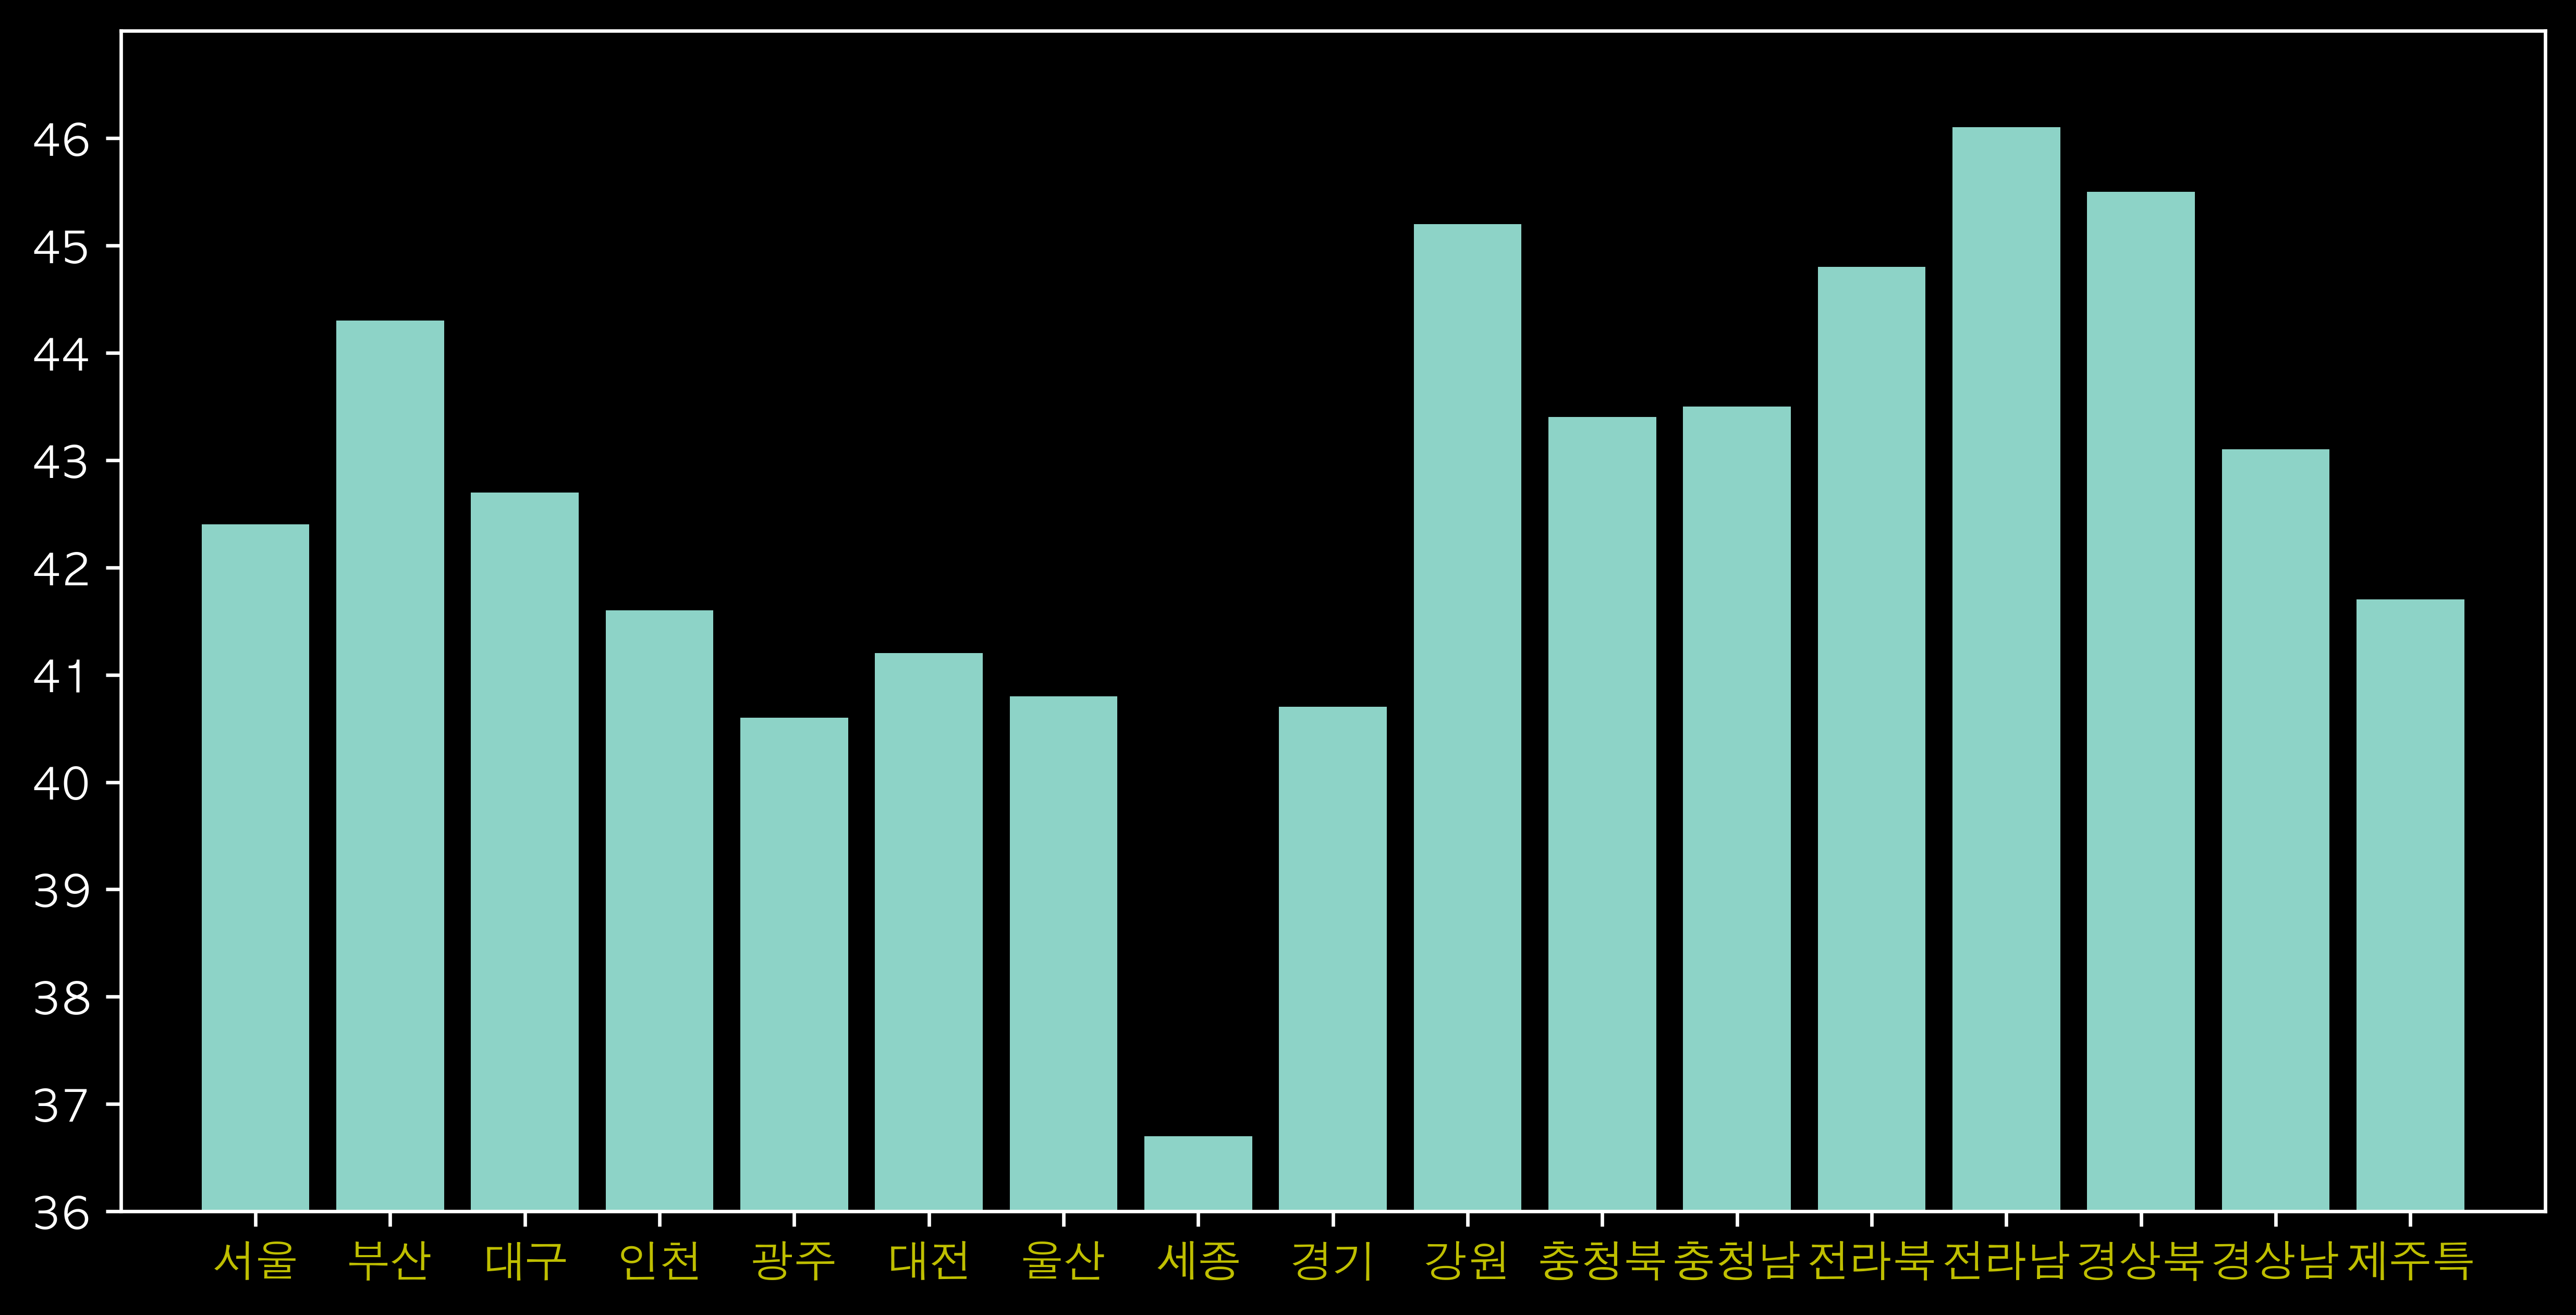

In [1]:
### 지역 간 평균 연령 비교 ###

import csv
import matplotlib.pyplot as plt

# 운영체제별 한글 폰트 설정
import os
os.name
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

f = open('dgpop202008.csv', encoding='utf-8-sig')
data = csv.reader(f)
next(data)

age = 0
area = []
ave = []

for row in data :
    if '00000000)' in row[0] :    # 특정 지역 찾기 https://metagenomics.tistory.com/entry/여러번-찾기
        area.append(row[0].split(' ')[0])
        for i in range(3, 103) :                    # 100살 이상은 뺐음. 99살까지만 셈
            row_m = int(row[i].replace(",", ""))    # ,때문에 int 인식 안됨. 문자열 바꾸기 https://ponyozzang.tistory.com/334
            age += row_m * int(i-2)
        a = round(float(age / int(row[1].replace(",", ""))), 1) 
        ave.append(a-1)            # 한 살 뺌 (제일 나이 어린 사람을 1살로 시작하여 계산했기 때문)
        age = 0

for i in range(0, len(area)) :    
    if i < 10 :
        area[i] = area[i][0:2]     # 지역 이름이 길어서 자름  https://wikidocs.net/2838
    elif i >= 10 :
        area[i] = area[i][0:3]

plt.style.use(['dark_background'])
plt.figure(figsize = (10,5), dpi=600)
plt.bar(area, ave)         
plt.xticks(range(17), color='y')
plt.yticks(range(36, 47, 1))           # plt.axis 이전에 놓아야 함. 정수 간격만 표현할 수 있음
plt.axis([-1, 17, 36, 47])   # 축의 범위 참고 https://codetorial.net/matplotlib/axis_range.html
plt.show()
